### 원 핫 인코딩
- Y의 features가 3가지 이상인 경우 데이터를 원핫 인코딩한다
- 0, 1, 2 인 경우
- 0 -> 1, 0, 0
- 1 -> 0, 1, 0
- 2 -> 0, 0, 2
- 모든 값은 0 또는 1로 맞추어 사용하기때문에 각 결과에 대해 sigmoid함수를 사용할 수 있다.
- 최종 예측 결과 중에 가장 큰 값의 위치가 최종 결과 데이터가 된다.

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고가 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리 알고리즘 (비지도 학습)
# 문자열 데이터를 숫자로 변환한다.
from sklearn.preprocessing import LabelEncoder
# 표준편차를 기반으로 표준화 한다.
# 잘못된 학습을 정상화 시키는 목적으로 사용한다.
from sklearn.preprocessing import StandardScaler

# 데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split
# 교차 검증
from sklearn.model_selection import cross_val_score

# 평가 함수
# 정확도 평가 함수
from sklearn.metrics import accuracy_score
# mse 평가 함수
from sklearn.metrics import mean_squared_error

# 학습 알고리즘 - 분류
# 최 근접 이웃
# 학습시 : 주어진 데이터를 저장만 한다.
# 예측 : 주변의 데이터를 보고 가장 많은 결과로 결정한다.
from sklearn.neighbors import KNeighborsClassifier
# 선형
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 트리
# 학습시 : 주어진 데이터를 가지고 질문들을 생성한다.
# 예측시 : 질문을 통해 최종 결과를 예측한다.
from sklearn.tree import DecisionTreeClassifier
# 앙상블 - 다수의 알고리즘이 던지는 결과를 취합하여 최종 결과를 결정한다.
# 트리들을 사용한다.
# 학습시 - 데이터를 랜덤하게 섞어서 80%를 추출한다.
# 이렇게 추출된 데이터를 트리의 개수만큼 생성하여 각 트리들에게 주고
# 학습을 수행한다.
# 예측시 - 각 트리가 던지는 결과를 취합하여 다수결의 원칙으로 최종 결과를
# 결정한다.
from sklearn.ensemble import RandomForestClassifier
# 부스팅
# 앙상블 알고리즘이 잘못 예측한 데이터를 다시 학습하는 방식
# 학습과 예측 원리를 앙상블과 동일하다.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 학습 알고리즘 - 회귀
# 최 근접 이웃
from sklearn.neighbors import KNeighborsRegressor
# 선형
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
# 트리
from sklearn.tree import DecisionTreeRegressor
# 앙상블
from sklearn.ensemble import RandomForestRegressor
# 부스팅
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 딥러닝
import tensorflow as tf

# 딥러닝 모델의 각 층을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형회귀를 수행하는 은닉층
from tensorflow.keras.layers import Dense
# 활성화 함수를 관리하는 것
from tensorflow.keras.layers import Activation

# 조기중단
from tensorflow.keras.callbacks import EarlyStopping

# 성능이 개선되면 모델을 파일로 자동 저장한다
from tensorflow.keras.callbacks import ModelCheckpoint

# 저장된 딥러닝모델 불러오기 .h5파일
from tensorflow.keras.models import load_model


# 원핫 인코딩 하는 함수
from tensorflow.keras.utils import to_categorical

### 데이터를 불러온다.

In [2]:
# 이 파일은 첫 줄부터 데이터라 header = None을 넣어준다
df1 = pd.read_csv('data/iris.csv', header = None)
df1

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 데이터 전처리

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# 문자열 데이터를 숫자로 변환한다.
encoder1 = LabelEncoder()
df1[4] = encoder1.fit_transform(df1[4])
df1

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# 입력과 결과로 나눈다.
X = df1.drop(4, axis=1)
y = df1[4]

display(X)
display(y)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: 4, Length: 150, dtype: int32

In [6]:
# 입력데이터 X 의 컬럼 개수를 파악한다.
n_features = X.shape[1]
n_features
# 입력층의 노드 개수 4개가 되는거임

4

In [7]:
# 결과 데이터의 종류 수
a1 = y.value_counts()
n_classes = len(a1)
n_classes
# y데이터 feature가 3개임 => 다중분류문제

3

In [8]:
# 표준화
# 머신러닝 -> 학습이 정상적으로 이루어지기 위해...
# 딥러닝 -> 학습 속도를 빠르게 하기 위해..
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [9]:
# 결과 데이터 원 핫 인코딩
y_encoded = to_categorical(y)
y_encoded
# 출력 노드가 세개가 되는거임

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [10]:
# 랜덤을 고정한다.
np.random.seed(1)
tf.random.set_seed(1)

In [11]:
# 모델을 설계한다.
model = Sequential()

# 첫 번째 은닉층은 input_dim 속성을 통해 입력층의 노드를 설정해 준다.
model.add(Dense(40, input_dim=n_features))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('relu'))

# 출력층
# 다중분류의 경우
# 출력층의 노드의 개수는 종속변수 feature수
# 출력층의 활성화 함수는 softmax
model.add(Dense(n_classes))
model.add(Activation('softmax'))

In [12]:
# 모델 컴파일
# loss : 오차를 평가할 함수. 
# 다중 분류 : categorical_crossentropy
# optimizer : 경사하강법. adam을 사용한다.
# metircs : 학습 중 평가를 위한 함수. accuracy
model.compile(loss='categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

In [13]:
# 학습용과 검증용 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1)

In [14]:
# 조기 중단
# 검증용 데이터의 손실률을 모니터링 하면서 더이상 개선되지 않는 다고 한다면
# 학습을 중단시킨다.
# patience : 손실률을 몇번을 더 볼것인가를 설정한다. 손실률이 개선되고 여기서
# 정한 학습 횟수만큼 더 진행이 되는 동안에 개선이되지 않는다면 중단한다.
callback1 = EarlyStopping(monitor='val_loss', patience=50)

In [15]:
# 자동저장
# 검증용 데이터의 손실률을 모니터링 하게 하여 개선이 될 경우 저장한다
file_name = '07_model.h5'

# save_best_only : 모니터링하는 순실률의 최하 수치보다 더 개선될때만 저장
# True안넣으면 patience 50번 더 갔을 때 모델로 저장됨
callback2 = ModelCheckpoint(filepath=file_name, monitor = 'val_loss', save_best_only = True)

In [16]:
# 학습한다.
# 첫번째, 두번째 : 학습데이터
# 세번째 : 학습 횟수
# 네번째 : 학습을 위해 사용하는 메모리 공간(ram이나 vram)에 저장하는
# 데이터 양.
# validation_data : 검증용으로 사용할 데이터
# callbacks : 조기중단, 자동저장을 설정한다.
history = model.fit(X_train, y_train, epochs=10000, batch_size=500,
                   validation_data=(X_test, y_test),
                   callbacks=[callback1, callback2])

Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 1.0543 - accuracy: 0.4107 - val_loss: 1.0631 - val_accuracy: 0.3158
Epoch 2/10000
1/1 [==============================] - 0s 103ms/step - loss: 1.0378 - accuracy: 0.4821 - val_loss: 1.0496 - val_accuracy: 0.5263
Epoch 3/10000
1/1 [==============================] - 0s 101ms/step - loss: 1.0218 - accuracy: 0.6518 - val_loss: 1.0361 - val_accuracy: 0.5789
Epoch 4/10000
1/1 [==============================] - 0s 98ms/step - loss: 1.0060 - accuracy: 0.8214 - val_loss: 1.0230 - val_accuracy: 0.6053
Epoch 5/10000
1/1 [==============================] - 0s 97ms/step - loss: 0.9905 - accuracy: 0.8214 - val_loss: 1.0104 - val_accuracy: 0.6316
Epoch 6/10000
1/1 [==============================] - 0s 101ms/step - loss: 0.9755 - accuracy: 0.7946 - val_loss: 0.9984 - val_accuracy: 0.6316
Epoch 7/10000
1/1 [==============================] - 0s 103ms/step - loss: 0.9609 - accuracy: 0.7857 - val_loss: 0.9869 - val_accuracy: 0.6053
Epoc

Epoch 58/10000
1/1 [==============================] - 0s 124ms/step - loss: 0.3811 - accuracy: 0.8661 - val_loss: 0.4529 - val_accuracy: 0.7895
Epoch 59/10000
1/1 [==============================] - 0s 124ms/step - loss: 0.3736 - accuracy: 0.8661 - val_loss: 0.4444 - val_accuracy: 0.7895
Epoch 60/10000
1/1 [==============================] - 0s 128ms/step - loss: 0.3663 - accuracy: 0.8661 - val_loss: 0.4361 - val_accuracy: 0.7895
Epoch 61/10000
1/1 [==============================] - 0s 128ms/step - loss: 0.3591 - accuracy: 0.8661 - val_loss: 0.4281 - val_accuracy: 0.7895
Epoch 62/10000
1/1 [==============================] - 0s 120ms/step - loss: 0.3521 - accuracy: 0.8661 - val_loss: 0.4203 - val_accuracy: 0.7895
Epoch 63/10000
1/1 [==============================] - 0s 111ms/step - loss: 0.3453 - accuracy: 0.8750 - val_loss: 0.4128 - val_accuracy: 0.7895
Epoch 64/10000
1/1 [==============================] - 0s 113ms/step - loss: 0.3386 - accuracy: 0.8750 - val_loss: 0.4055 - val_accuracy:

Epoch 115/10000
1/1 [==============================] - 0s 117ms/step - loss: 0.1422 - accuracy: 0.9732 - val_loss: 0.1934 - val_accuracy: 0.9211
Epoch 116/10000
1/1 [==============================] - 0s 102ms/step - loss: 0.1400 - accuracy: 0.9732 - val_loss: 0.1908 - val_accuracy: 0.9211
Epoch 117/10000
1/1 [==============================] - 0s 111ms/step - loss: 0.1379 - accuracy: 0.9732 - val_loss: 0.1883 - val_accuracy: 0.9211
Epoch 118/10000
1/1 [==============================] - 0s 111ms/step - loss: 0.1358 - accuracy: 0.9732 - val_loss: 0.1857 - val_accuracy: 0.9211
Epoch 119/10000
1/1 [==============================] - 0s 94ms/step - loss: 0.1339 - accuracy: 0.9732 - val_loss: 0.1831 - val_accuracy: 0.9211
Epoch 120/10000
1/1 [==============================] - 0s 102ms/step - loss: 0.1320 - accuracy: 0.9732 - val_loss: 0.1807 - val_accuracy: 0.9211
Epoch 121/10000
1/1 [==============================] - 0s 95ms/step - loss: 0.1301 - accuracy: 0.9732 - val_loss: 0.1783 - val_accu

Epoch 172/10000
1/1 [==============================] - 0s 93ms/step - loss: 0.0723 - accuracy: 0.9821 - val_loss: 0.0836 - val_accuracy: 0.9737
Epoch 173/10000
1/1 [==============================] - 0s 88ms/step - loss: 0.0716 - accuracy: 0.9821 - val_loss: 0.0825 - val_accuracy: 0.9737
Epoch 174/10000
1/1 [==============================] - 0s 93ms/step - loss: 0.0710 - accuracy: 0.9821 - val_loss: 0.0814 - val_accuracy: 0.9737
Epoch 175/10000
1/1 [==============================] - 0s 91ms/step - loss: 0.0703 - accuracy: 0.9821 - val_loss: 0.0804 - val_accuracy: 0.9737
Epoch 176/10000
1/1 [==============================] - 0s 94ms/step - loss: 0.0696 - accuracy: 0.9821 - val_loss: 0.0795 - val_accuracy: 0.9737
Epoch 177/10000
1/1 [==============================] - 0s 102ms/step - loss: 0.0690 - accuracy: 0.9821 - val_loss: 0.0786 - val_accuracy: 0.9737
Epoch 178/10000
1/1 [==============================] - 0s 90ms/step - loss: 0.0683 - accuracy: 0.9821 - val_loss: 0.0778 - val_accuracy

Epoch 229/10000
1/1 [==============================] - 0s 114ms/step - loss: 0.0477 - accuracy: 0.9911 - val_loss: 0.0542 - val_accuracy: 0.9737
Epoch 230/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0474 - accuracy: 0.9911 - val_loss: 0.0541 - val_accuracy: 0.9737
Epoch 231/10000
1/1 [==============================] - 0s 99ms/step - loss: 0.0471 - accuracy: 0.9911 - val_loss: 0.0540 - val_accuracy: 0.9737
Epoch 232/10000
1/1 [==============================] - 0s 97ms/step - loss: 0.0469 - accuracy: 0.9911 - val_loss: 0.0539 - val_accuracy: 0.9737
Epoch 233/10000
1/1 [==============================] - 0s 96ms/step - loss: 0.0466 - accuracy: 0.9911 - val_loss: 0.0538 - val_accuracy: 0.9737
Epoch 234/10000
1/1 [==============================] - 0s 93ms/step - loss: 0.0464 - accuracy: 0.9911 - val_loss: 0.0537 - val_accuracy: 0.9737
Epoch 235/10000
1/1 [==============================] - 0s 105ms/step - loss: 0.0462 - accuracy: 0.9911 - val_loss: 0.0536 - val_accura

Epoch 286/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0368 - accuracy: 0.9911 - val_loss: 0.0537 - val_accuracy: 0.9737
Epoch 287/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0366 - accuracy: 0.9911 - val_loss: 0.0539 - val_accuracy: 0.9737
Epoch 288/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0365 - accuracy: 0.9911 - val_loss: 0.0541 - val_accuracy: 0.9737
Epoch 289/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0363 - accuracy: 0.9911 - val_loss: 0.0542 - val_accuracy: 0.9737
Epoch 290/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0362 - accuracy: 0.9911 - val_loss: 0.0543 - val_accuracy: 0.9737
Epoch 291/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0360 - accuracy: 0.9911 - val_loss: 0.0543 - val_accuracy: 0.9737
Epoch 292/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0358 - accuracy: 0.9911 - val_loss: 0.0544 - val_accuracy:

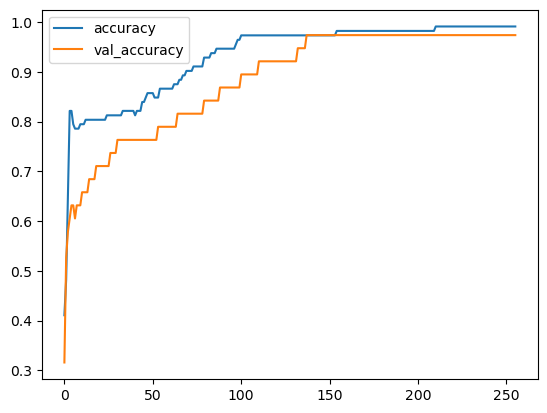

In [17]:
plt.plot(history.history['accuracy'][:-50], label='accuracy')
plt.plot(history.history['val_accuracy'][:-50], label='val_accuracy')
plt.legend()
plt.show()

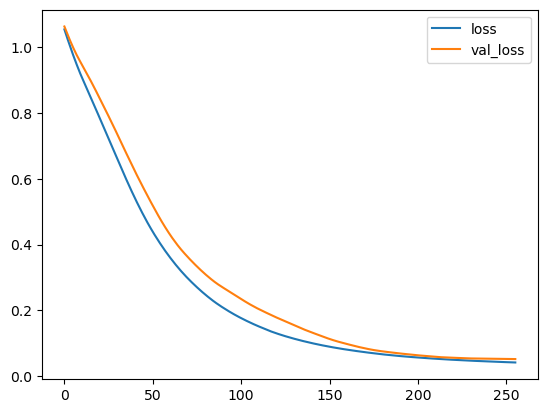

In [18]:
plt.plot(history.history['loss'][:-50], label='loss')
plt.plot(history.history['val_loss'][:-50], label='val_loss')
plt.legend()
plt.show()

In [20]:
# 모델을 복원한다
best_model = load_model('07_model.h5')
best_model

In [21]:
# 검증 데이터를 가지고 예측을 한다.
pred = best_model.predict(X_test)
pred

2/2 [==============================] - 0s 3ms/step


array([[9.98273253e-01, 1.62360491e-03, 1.03130245e-04],
       [2.30127387e-02, 9.75020707e-01, 1.96667621e-03],
       [1.35154498e-03, 9.94696379e-01, 3.95208644e-03],
       [9.98232961e-01, 1.60688104e-03, 1.60128038e-04],
       [6.80735902e-05, 3.19986120e-02, 9.67933357e-01],
       [5.36230626e-03, 9.67261374e-01, 2.73763034e-02],
       [2.52313839e-05, 2.25294591e-03, 9.97721851e-01],
       [9.97027814e-01, 2.71383231e-03, 2.58419983e-04],
       [9.99192297e-01, 7.74826738e-04, 3.28321112e-05],
       [7.62514082e-06, 3.61565413e-04, 9.99630809e-01],
       [1.45063538e-03, 9.92021739e-01, 6.52755797e-03],
       [9.96664941e-01, 3.08001856e-03, 2.55002669e-04],
       [2.62713183e-06, 1.47890663e-04, 9.99849439e-01],
       [3.64206382e-03, 9.85954702e-01, 1.04032792e-02],
       [3.01298546e-03, 9.37781274e-01, 5.92057630e-02],
       [9.99647021e-01, 3.36904166e-04, 1.61308071e-05],
       [7.02836784e-04, 9.97720063e-01, 1.57712121e-03],
       [9.27932374e-03, 9.34831

In [26]:
# 값을 환산하고 평가한다
# axis : 처리의 기준, 0은 row, 1은 col
# 1을 넣으면 각 행별로 몇 번째 컬럼값이 가장 큰지 알 수 있다
result = np.argmax(pred, axis = 1) # 소숫점으로 나온애들 정수로 변환(카테고리형 데이터로)
y_original = np.argmax(y_test, axis = 1)

r1 = accuracy_score(y_original, result)
r1 # 정확도가 0.97

0.9736842105263158